### Inspect filtering with ACAE  


In [1]:
import json
import seaborn as sn
import os 
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import shutil
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# set up font for export to make it illustrator friendly
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [30]:
# import JSON file
with open('/home/aogorodnikov/aae_filter_classes/classes_rgb_corrected_5k_fin.json', 'r') as json_file:  
    data = json.load(json_file)

## Distributions  
Compare distributions of losses within classes

In [31]:
df = pd.DataFrame(data)
df['phenotype'] = df.image.str.split(pat='/', expand=True).iloc[:,4]

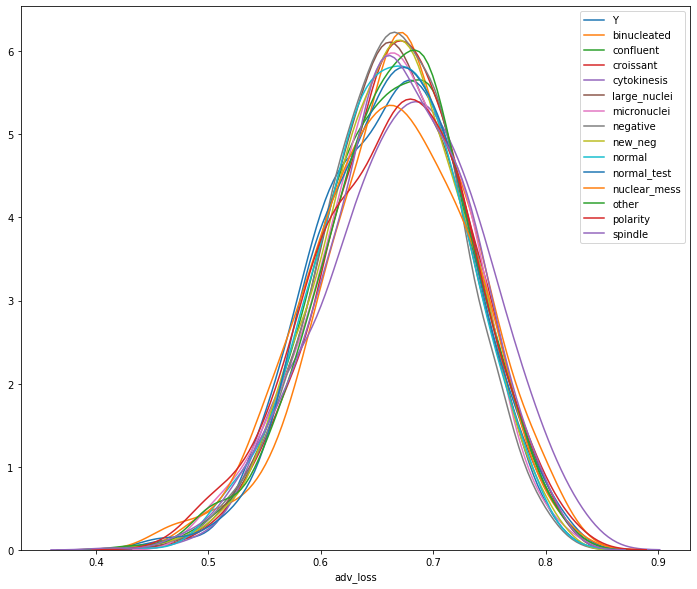

In [32]:
fig, ax = plt.subplots(figsize=(12, 10))
for l in df.phenotype.unique():
    to_plot = df[df.phenotype == l]
    g = sns.distplot(to_plot.adv_loss, hist=False, label=l)

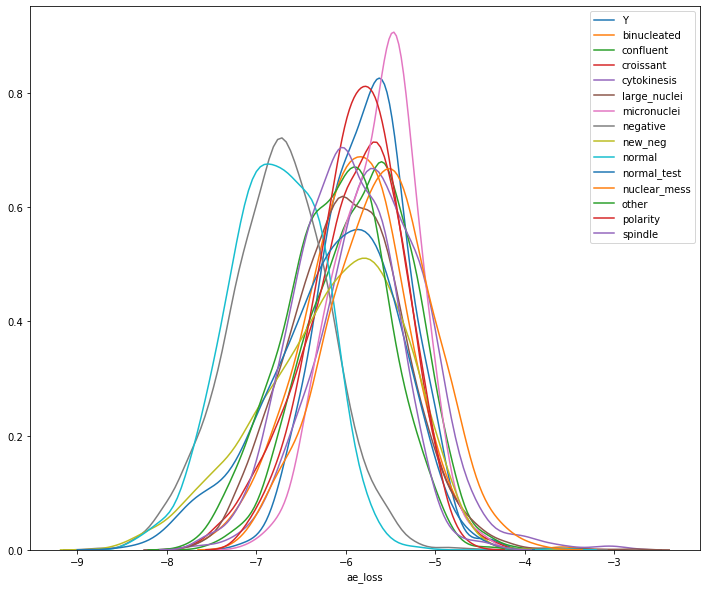

In [33]:
fig, ax = plt.subplots(figsize=(12, 10))
for l in df.phenotype.unique():
    to_plot = df[df.phenotype == l]
    g = sns.distplot(np.log(to_plot.ae_loss), hist=False, label=l)

In [37]:
to_plot = ['negative', 'normal_test', 'binucleated']
df_sub = df[df.phenotype.isin(to_plot)]

In [38]:
df_sub.shape

(6509, 4)

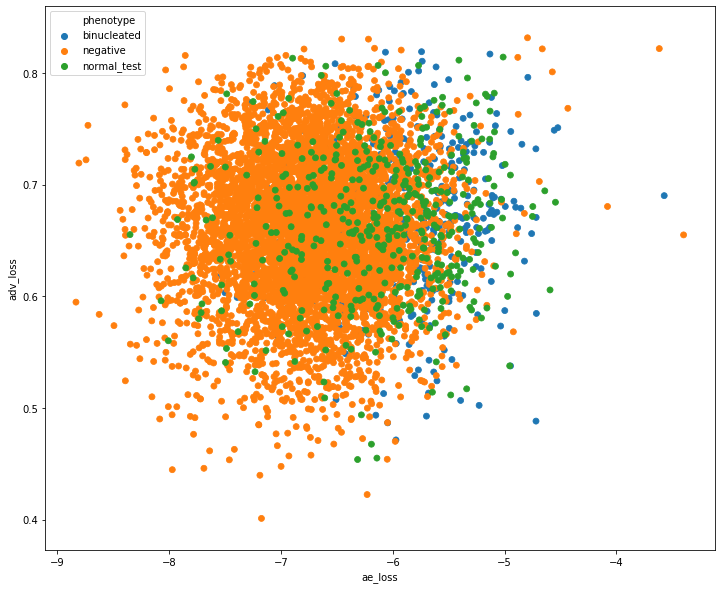

In [39]:
fig, ax = plt.subplots(figsize=(12, 10))


sn.scatterplot(np.log(df_sub.ae_loss), df_sub.adv_loss, hue=df_sub.phenotype, edgecolor=None)

In [20]:
pd.DataFrame(data['ae_loss']).describe()

,0
count,29056.000000
mean,0.002682
std,0.002080
min,0.000146
25%,0.001283
50%,0.002195
75%,0.003565
max,0.063530


In [12]:
pd.DataFrame(data['adv_loss']).describe()

,0
count,27973.000000
mean,0.667837
std,0.065049
min,0.366233
25%,0.624458
50%,0.670677
75%,0.713558
max,0.832555
